Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 131us/step - loss: 3.3486 - acc: 0.2092 - val_loss: 3.1418 - val_acc: 0.2959
Epoch 2/100
50000/50000 [==============================] - 6s 120us/step - loss: 3.0143 - acc: 0.3318 - val_loss: 2.8915 - val_acc: 0.3877
Epoch 3/100
50000/50000 [==============================] - 6s 119us/step - loss: 2.8237 - acc: 0.4021 - val_loss: 2.7484 - val_acc: 0.4311
Epoch 4/100
50000/50000 [==============================] - 6s 120us/step - loss: 2.7027 - acc: 0.4450 - val_loss: 2.6807 - val_acc: 0.4459
Epoch 5/100
50000/50000 [==============================] - 6s 120us/step - loss: 2.6272 - acc: 0.4717 - val_loss: 2.6213 - val_acc: 0.4663
Epoch 6/100
50000/50000 [==============================] - 6s 121us/step - loss: 2.5693 - acc: 0.4906 - val_loss: 2.5389 - val_acc: 0.4971
Epoch 7/100
50000/50000 [==============================] - 6s 120us/step - loss: 2.5123 - acc: 0.5113 - val_loss: 2.

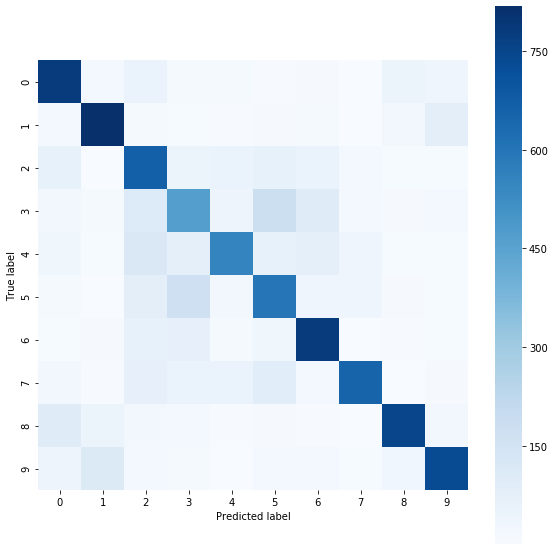

In [0]:
# baseline model on the cifar10 dataset
# Codes from below mentioned web site is used as a reference to build baseline model.
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

#@author: Aditya Chavan

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# load train and test dataset
def load_dataset():
	# load dataset
	(train_X, train_Y), (test_X, test_Y1) = cifar10.load_data()
	# one hot encode target values
	train_Y = to_categorical(train_Y)
	test_Y = to_categorical(test_Y1)
	return train_X, train_Y, test_X, test_Y, test_Y1

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	training_norm = train.astype('float32')
	testing_norm = test.astype('float32')
	# normalize to range 0-1
	training_norm = training_norm / 255.0
	testing_norm = testing_norm / 255.0
	# return normalized images
	return training_norm, testing_norm

# define cnn modez
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	train_X, train_Y, test_X, test_Y, test_Y1 = load_dataset()
	# prepare pixel data
	train_X, test_X = prep_pixels(train_X, test_X)
	# define model
	model = define_model()
	# fit model
	history = model.fit(train_X, train_Y, epochs=100, batch_size=500, validation_data=(test_X, test_Y), verbose=1)
	#confusion matrix
	y_pred_ohe = model.predict(test_X) 
	y_pred_labels = np.argmax(y_pred_ohe, axis=1) 
	confusion_matrix = metrics.confusion_matrix(y_true=test_Y1, y_pred=y_pred_labels)
	figure = pyplot.figure(figsize=(8, 8))
	sns.heatmap(confusion_matrix, annot=False,cmap=pyplot.cm.Blues)
	pyplot.tight_layout()
	pyplot.ylabel('True label')
	pyplot.xlabel('Predicted label')
	pyplot.imshow(confusion_matrix)
	# evaluate model
	_, acc = model.evaluate(test_X, test_Y, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	#summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()